In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Get the data
# Given the features interest rate and unemployment rate ,predict the index price
data = pd.read_csv("../Data/economic_index.csv")
data.drop(columns=['Unnamed: 0','year','month'],axis=1,inplace=True)
data.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   interest_rate      24 non-null     float64
 1   unemployment_rate  24 non-null     float64
 2   index_price        24 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 708.0 bytes


In [11]:
data.describe()

,interest_rate,unemployment_rate,index_price
count,24.000000,24.00000,24.000000
mean,2.072917,5.77500,1070.083333
std,0.349527,0.33002,210.735341
min,1.750000,5.30000,704.000000
25%,1.750000,5.50000,928.250000
50%,2.000000,5.85000,1061.000000
75%,2.500000,6.10000,1239.000000
max,2.750000,6.20000,1464.000000


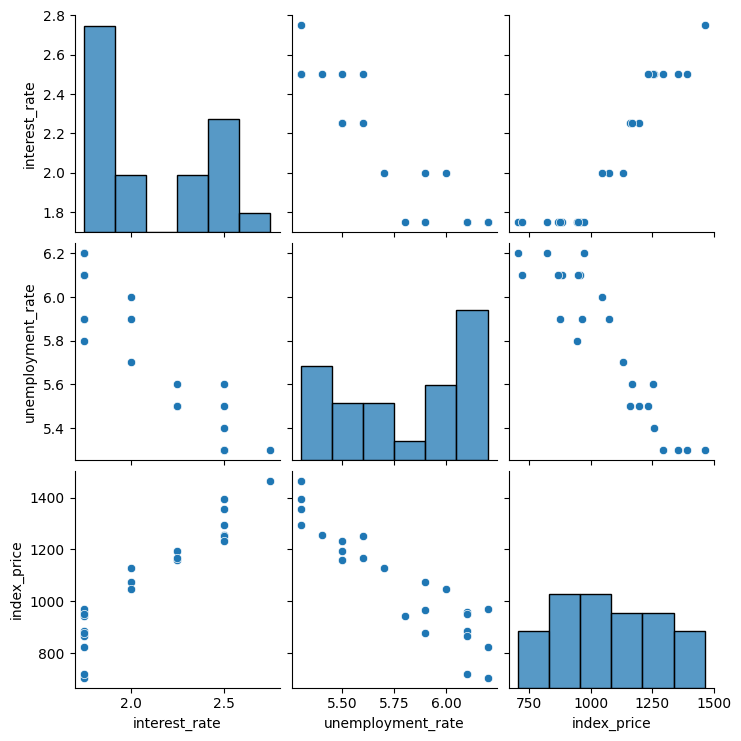

In [14]:
# Visualize the dataset
sns.pairplot(data)
plt.show()

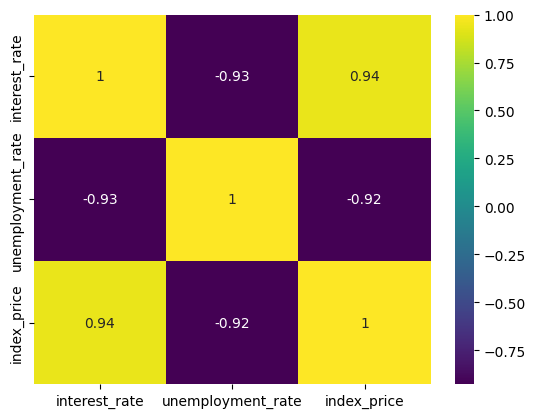

In [ ]:
# Co-relation between the features
corr = data.corr()
sns.heatmap(corr,cmap='viridis',annot=True)
plt.show()

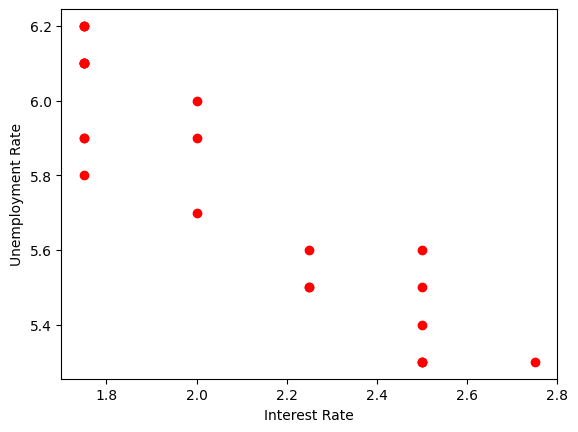

In [20]:
# Inverse relation between interest rate and unemployment rate
plt.scatter(x=data['interest_rate'],y=data['unemployment_rate'],color='r')
plt.xlabel("Interest Rate")
plt.ylabel("Unemployment Rate")
plt.show()

In [21]:
# Train test split
X = data[['interest_rate','unemployment_rate']]
y = data['index_price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(y_train.shape)

(18, 2)
(18,)


In [22]:
# Feature scalling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
# Linear model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [25]:
# Using cross validation score 
from sklearn.model_selection import cross_val_score
val_score = cross_val_score(estimator=model,
                            X=X_train,
                            y=y_train,
                            scoring='neg_mean_squared_error',
                            cv=3)
print(val_score)
print(np.mean(val_score))

[-4921.61331265 -7686.87497294 -5135.9962549 ]
-5914.828180162386


In [26]:
# Model Predictions
y_pred = model.predict(X_test)

In [27]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

5793.762887712569
59.935781523235484
76.11677139574805


In [28]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)
#display adjusted R-squared
print(1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.8278978091457145
0.7131630152428576
